# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

In [1]:
! git clone https://github.com/ds4e/linearModels

Cloning into 'linearModels'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 43 (delta 5), reused 4 (delta 4), pack-reused 35 (from 2)
Receiving objects: 100% (43/43), 4.12 MiB | 4.12 MiB/s, done.
Resolving deltas: 100% (8/8), done.


**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

ANSWER

1. Linear is describing the the pattern/ trend of the relationship of two variables. This describes how the independent and dependent variables are related and a constant rate of change ( which means the slope is constant) between the two variables. Linear in relationship ( meaing strong relationship between the two variables)
   
2. If you keep the intercept, the coefficeints represents the difference of baseline which if you remove the intercept, the coefficent represents distinct values of the dummy variable and not the difference from the baseline.
   
3. Not really, classification involves discrete variables and linear regression is used for continous variables.Linear regression is used for predicting continous variables. It may be hard to transfer between those data types/
   
4. Overfitting is when the model is too specific and targeted towards features making them not generalizable. Some signs are having a high correlation but training data performance is low and having high variance
   
5. Multi-colinearity happens when independent varaibles in a model are highly correlated with each other- causing difficulty in detemrining isolated effects on y. The 2SLS technique address this problem by
   *stage 1: identifying the instrument variable that is correlated with the predictor and IV supports efforts in creating a new variable
   *stage 2: this uses values that the above model got and replace the actual values of the problematic predictors- helps isolate the effect.

6. You can incorporate nonlinear relationships by using switching to a different model like neural networks or polynomial regression or use interactions to have combined effects of multiple features
   
7. Intercept is the values you get when x value is 0, slope coefficent is the rate of change ( in y for one unit increase) and dummy variable coefficents are the difference from the baseline.

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [3]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading dataset
df= pd.read_csv("linearModels/assignment/data/Q1_clean.csv")

In [5]:
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [8]:
df= df.rename(columns= {'Neighbourhood ':'Neighbourhood'})
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [9]:
# Let's first see what we are working with
df.isnull().sum()# no missing variables :)

,0
Price,0
Review Scores Rating,0
Neighbourhood,0
Property Type,0
Room Type,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22153 entries, 0 to 22152
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 22153 non-null  int64  
 1   Review Scores Rating  22153 non-null  float64
 2   Neighbourhood         22153 non-null  object 
 3   Property Type         22153 non-null  object 
 4   Room Type             22153 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 865.5+ KB


In [11]:
df.describe()

,Price,Review Scores Rating
count,22153.000000,22153.000000
mean,154.787388,91.993093
std,148.843320,8.850658
min,10.000000,20.000000
25%,85.000000,89.000000
50%,125.000000,94.000000
75%,190.000000,100.000000
max,10000.000000,100.000000


In [14]:
mean_p= df.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean()
print(mean_p)

                    Price  Review Scores Rating
Neighbourhood                                  
Bronx           75.276498             91.654378
Brooklyn       127.747378             92.363497
Manhattan      183.664286             91.801496
Queens          96.857233             91.549057
Staten Island  146.166667             90.843750


Looks like Manhattan is more expensive on average

<Axes: xlabel='Price', ylabel='Density'>

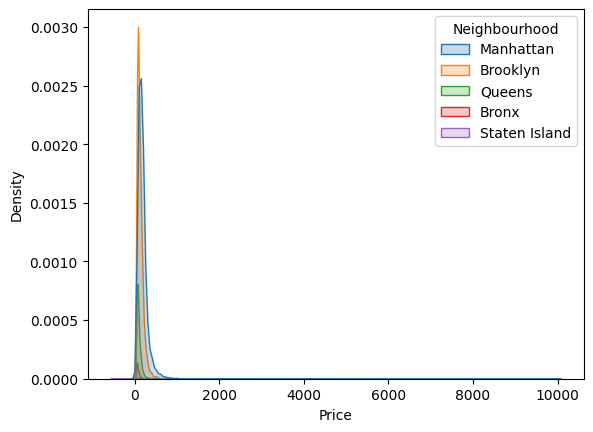

In [16]:
sns.kdeplot(data=df,x= 'Price',hue= 'Neighbourhood' , fill= True)

<Axes: xlabel='LogP', ylabel='Density'>

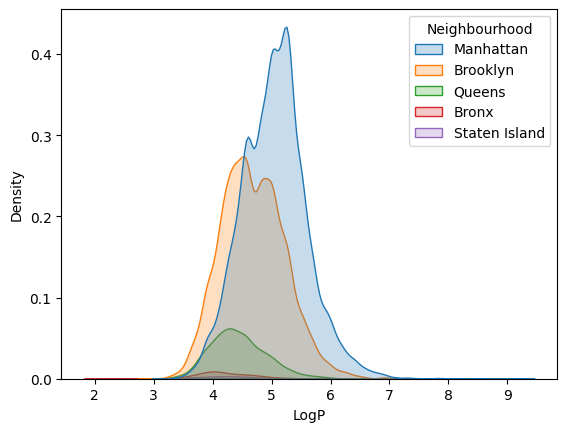

In [18]:
# Lets put into log scale so we can see stuff better
df['LogP'] = np.log(df['Price'])
sns.kdeplot(data= df, x= 'LogP', hue= 'Neighbourhood', fill= True)

In [21]:
from sklearn.linear_model import LinearRegression
df_dummy= pd.get_dummies(df['Neighbourhood'], drop_first= True) # dropping the frist column ( no intercept)
x1= df_dummy
y1= df['Price']

equation_model= LinearRegression(fit_intercept= False)
equation_model.fit(x1,y1)
print(equation_model.coef_)

[127.74737834 183.66428632  96.8572327  146.16666667]


After comparing the coefficent in the regression above with the grouped table, I noticed that the price column from the table correlated/ matched values exactly with the regression values we got, however there were only 4, but orginally we had 5 (the bronx price is missing)- likely because we dropped the first column. The coefficents represents difference in price between each neighbourhood.

In [26]:
# including intercept
from sklearn.linear_model import LinearRegression
df_dummy= pd.get_dummies(df['Neighbourhood'], drop_first= False) # not dropping the frist column ( need  intercept)
x1= df_dummy
y1= df['Price']

equation_model= LinearRegression()
equation_model.fit(x1,y1)
print("Coefficeints", equation_model.coef_)
print("Intercept", equation_model.intercept_)

Coefficeints [-50.66591465   1.804966    57.72187398 -29.08517964  20.22425432]
Intercept 125.9424123463574


The intercept is 125.94, the coefficents interncepts is : -50.66591465   1.804966    57.72187398 -29.08517964  20.22425432, we got these coeffficents in part 2 from these new conffiectens by keeping the intercept column

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [35]:
#USED CHATGTP to help me on some of this

df_dummy = pd.get_dummies(df['Neighbourhood'], drop_first=True)
X = df[['Review Scores Rating']].join(df_dummy)  # Include Review Scores Rating and Neighbourhood dummies
y = df['Price']  # Price as the dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
print(f"Coefficient for Reivew Score Rating: {model.coef_[0]}")

RMSE: 140.91821103729345
Coefficient for Reivew Score Rating: 1.2118517840632352


The most expenive neighbourhood would still be manhantan (based on previous answers)

In [ ]:
# Now we have to train/test for porperty type ( we can bascially use the same process above)

In [59]:
df_dummy = pd.get_dummies(df[['Neighbourhood', 'Property Type']], drop_first=True)
X = df[['Review Scores Rating']].join(df_dummy)  # Include Review Scores Rating and Neighbourhood dummies
y = df['Price']  # Price as the dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
print(f"Coefficient for Reivew Score Rating: {model.coef_[0]}")
# Most expensive property type based on coefficients (exclude Review Scores Rating and Neighbourhood)
# Filter out columns related to Neighbourhood

# ASKED CHATGTP ON HOW TO GET THIS
coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

property_type_coeffs = coeffs[coeffs.index.str.startswith('Property Type_')]

# Find the property type with the maximum coefficient
max_coeff_property_type = property_type_coeffs.idxmax()[0]

# Extract the property type name from the column name
most_expensive_property_type = max_coeff_property_type.split('_')[1]

# Print the most expensive property type
print(f"The most expensive property type is: {most_expensive_property_type}")



RMSE: 140.30266238276283
Coefficient for Reivew Score Rating: 1.2010106602298556
The most expensive property type is: Bungalow


<ipython-input-59-c1cdee96778a>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_coeff_property_type = property_type_coeffs.idxmax()[0]


Looks like the expenisve property type is Bungalow

** STEP 6. ANSWER** The Coefficient on Review Scores Rating chaning value from part 4 to 5 means that in part 5 we are accounint gofr neighbourhood and property type ( more than one variable to look at while from part 4 it's just one indendept variable to look at  

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [61]:
#Loading the data
df1= pd.read_csv("linearModels/assignment/data/cars_hw.csv")
df1.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [62]:
df1.isnull().sum() # no missing values

,0
Unnamed: 0,0
Make,0
Make_Year,0
Color,0
Body_Type,0
Mileage_Run,0
No_of_Owners,0
Seating_Capacity,0
Fuel_Type,0
Transmission,0


In [65]:
print(df1.info())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
None
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963

In [68]:
# Handling price ( log transformation)
df1['Price'] = np.log1p(df1['Price'])  # log(1 + Price) to handle zero values
print(df1.describe())
# Looking at the mILEAGE_rUN VARIABLE WE COuld probabily do a log transformation too


       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity       Price
count  976.000000   976.000000    976.000000        976.000000  976.000000
mean   488.500000  2016.963115  41571.195697          5.095287    1.299477
std    281.891232     2.818742  24390.995134          0.446224    0.008491
min      1.000000  2011.000000   1117.000000          4.000000    1.274239
25%    244.750000  2015.000000  22676.750000          5.000000    1.293146
50%    488.500000  2017.000000  37570.500000          5.000000    1.299622
75%    732.250000  2019.000000  57421.250000          5.000000    1.304878
max    976.000000  2022.000000  99495.000000          8.000000    1.326002


count    976.000000
mean       1.299477
std        0.008491
min        1.274239
25%        1.293146
50%        1.299622
75%        1.304878
max        1.326002
Name: Price, dtype: float64


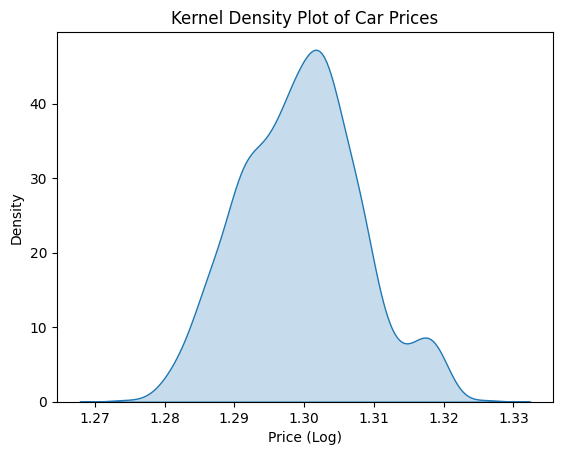

In [75]:
# let's summarize the Price column
sum_price= df1['Price'].describe()
print(sum_price)
sns.kdeplot(df1['Price'], fill=True)
plt.title("Kernel Density Plot of Car Prices")
plt.xlabel("Price (Log)")
plt.ylabel("Density")
plt.show()

In [76]:
# Let's make a table grouped by the brand

price_brand= df1.groupby('Make')['Price'].describe()
print(price_brand)

               count      mean       std       min       25%       50%  \
Make                                                                     
Chevrolet        6.0  1.289975  0.009377  1.281578  1.283075  1.286806   
Datsun           3.0  1.283238  0.000741  1.282480  1.282876  1.283271   
Ford            52.0  1.300689  0.004016  1.283271  1.298704  1.300748   
Honda           73.0  1.301910  0.006329  1.285017  1.297008  1.302696   
Hyundai        305.0  1.298706  0.007580  1.280054  1.293521  1.298793   
Jeep             4.0  1.314359  0.001860  1.311764  1.313773  1.314782   
Kia              8.0  1.315691  0.001354  1.312823  1.315345  1.315887   
MG Motors       35.0  1.318253  0.001150  1.315457  1.317504  1.318093   
Mahindra        18.0  1.308663  0.002902  1.302955  1.307825  1.308803   
Maruti Suzuki  293.0  1.295846  0.007158  1.279112  1.290274  1.295132   
Nissan           4.0  1.303861  0.007386  1.293115  1.301969  1.306666   
Renault         68.0  1.298412  0.0063

Text(0, 0.5, 'Density')

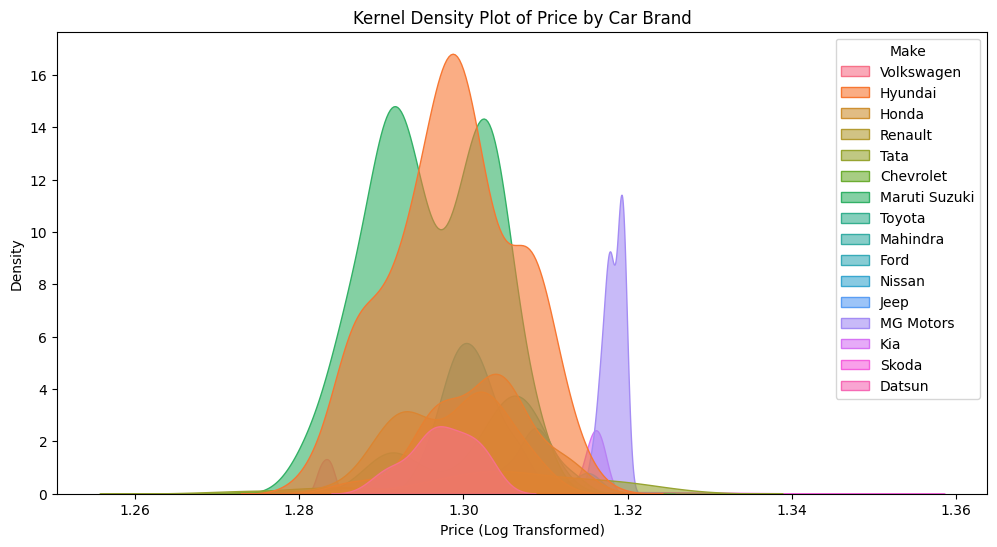

In [78]:
# Now let's look at grouped KDE plot
plt.figure(figsize= (12,6))
sns.kdeplot(data=df1, x='Price', hue='Make', fill=True, alpha=0.6)
plt.title("Kernel Density Plot of Price by Car Brand")
plt.xlabel("Price (Log Transformed)")
plt.ylabel("Density")

In [83]:
# finding out the most expensive makes
ex = df1.groupby('Make')['Price'].mean().sort_values(ascending=False)
print("Most Expensive Car Brands Based on Mean Price:\n",ex.head(5))

Most Expensive Car Brands Based on Mean Price:
 Make
MG Motors    1.318253
Kia          1.315691
Jeep         1.314359
Mahindra     1.308663
Tata         1.304994
Name: Price, dtype: float64


In [85]:
# Now let's split data fro Train/Test
from sklearn.model_selection import train_test_split

x1= df1.drop("Price", axis=1) # split data but only including the features
y1= df1['Price']

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)


First model

In [86]:
# Defining the data types
numeric_features = ['Seating_Capacity', 'Mileage_Run', 'Make_Year']
categorical_features = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission_Type']

In [113]:
# USED CHATGTP TO HELP ME DEBUG
from sklearn.metrics import r2_score, mean_squared_error
X_train_num = X_train[numeric_features]  # Use numeric columns for training
X_test_num = X_test[numeric_features]    # Use numeric columns for testing

# Train Linear Regression Model
model_num = LinearRegression()
model_num.fit(X_train_num, y_train)

# Predict
y_train_pred_num = model_num.predict(X_train_num)
y_test_pred_num = model_num.predict(X_test_num)

# Evaluate Performance
train_r2 = r2_score(y_train, y_train_pred_num)
test_r2 = r2_score(y_test, y_test_pred_num)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_num))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_num))

print("Numerical Model Performance:")
print("Train R²:", r2_score(y_train, y_train_pred_num))
print("Test R²:", r2_score(y_test, y_test_pred_num))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_num)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_num)))

Numerical Model Performance:
Train R²: 0.42326278458069777
Test R²: 0.3832272156401485
Train RMSE: 0.0064812159985238055
Test RMSE: 0.006491959315459091


Second model

In [115]:
# Model 2: Categorical Variables Only
from sklearn.metrics import mean_absolute_error
categorical_features = ['Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Make', 'Color']

X_train_cat = pd.get_dummies(X_train[categorical_features], drop_first=True)
X_test_cat = pd.get_dummies(X_test[categorical_features], drop_first=True)

X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

cat_model = LinearRegression()
cat_model.fit(X_train_cat, y_train)

y_train_pred_cat = cat_model.predict(X_train_cat)
y_test_pred_cat = cat_model.predict(X_test_cat)

train_rmse_cat = np.sqrt(mean_squared_error(y_train, y_train_pred_cat))
test_rmse_cat = np.sqrt(mean_squared_error(y_test, y_test_pred_cat))
train_mae_cat = mean_absolute_error(y_train, y_train_pred_cat)
test_mae_cat = mean_absolute_error(y_test, y_test_pred_cat)


print(train_rmse_cat)
print(test_rmse_cat)
print(train_mae_cat)
print(test_mae_cat)

0.0049593193130596635
0.004902375202729785
0.003961894959145959
0.004005408939786075


The model 2 had a little lower rmse and mae values than the model 1

third model ( combing model 1 and model 2)

In [120]:
x_train_combine= pd.concat([X_train_num, X_train_cat], axis=1)
x_test_combine= pd.concat([X_test_num, X_test_cat], axis=1)

# let's train the model

model_c1= LinearRegression()
model_c1.fit(x_train_combine, y_train)

# let's predict now

y_train_pred_combined = model_c1.predict(x_train_combine)
y_test_pred_combined = model_c1.predict(x_test_combine)

# let's just copy and past the exaluation performaces

train_rmse_combined = np.sqrt(mean_squared_error(y_train, y_train_pred_combined))
test_rmse_combined = np.sqrt(mean_squared_error(y_test, y_test_pred_combined))
train_r2_combined = r2_score(y_train, y_train_pred_combined)
test_r2_combined = r2_score(y_test, y_test_pred_combined)

print(train_rmse_combined)
print(test_rmse_combined)
print(train_r2_combined)
print(test_r2_combined)

0.0035612839068083495
0.003557873070542328
0.8258681637069498
0.8147515753412995


looks like the combined model did better because the r^2 value was higher ( it performs better) by 0.82 r^2 val

Question 5- Polynomial features

In [140]:
# importing necessary package
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_tr_poly = poly.fit_transform(X_train_num)
X_te_poly = poly.transform(X_test_num)

#train model

model_p = LinearRegression()
model_p.fit(X_tr_poly, y_train)

# prediction

y_pred_poly_train= model_p.predict(X_tr_poly)
y_pred_poly_test= model_p.predict(X_te_poly)

# copy and paste above performace metrics
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_pred_poly_train))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly_test))
train_r2_poly = r2_score(y_train, y_pred_poly_train)
test_r2_poly = r2_score(y_test, y_pred_poly_test)

print(train_rmse_poly)
print(test_rmse_poly)
print(train_r2_poly)
print(test_r2_poly)

0.006283504469437052
0.006292716781255822
0.45791318751316157
0.42050459809037866


As we incresase the polynomical degree it looks like the rmse increase for both train and test and r2 decreases ( less correlation present) at degree 18 it looks like r^2 for test became negative. In general this model does ok, but more generealized and not focused on spcefic features involved

Question 6 (from question 3)

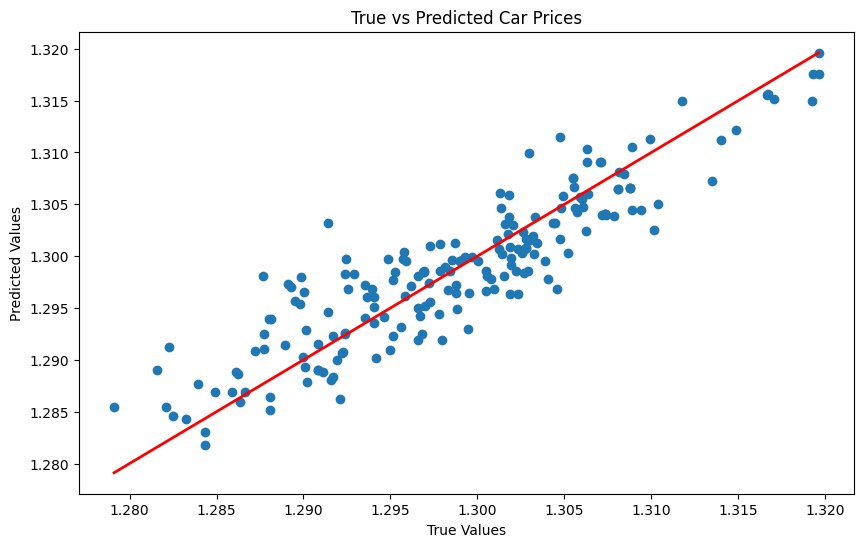

In [143]:
# let's do the comiined one
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred_combined)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Car Prices')
plt.show()

Yes, the predicted mode values do genrall line up

<Axes: xlabel='Price', ylabel='Density'>

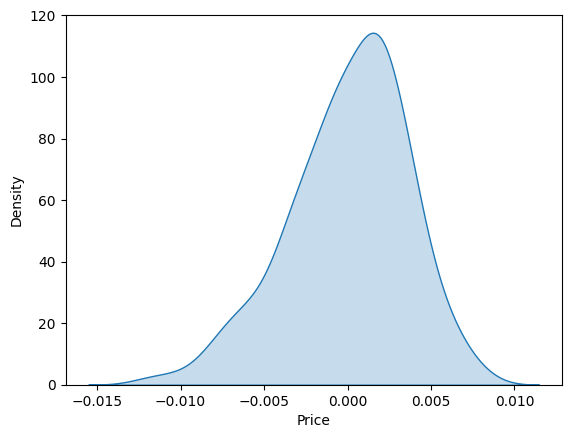

In [144]:
#heres evaluating accruacy using residual plots
res= y_test - y_test_pred_combined # comparing the y test and seeing how far it was from the comiined model test pred
sns.kdeplot(res, fill=True)



yes the kde plot does looke like a bell-shape aroung 0.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result.

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure.

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm.

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
